In [1]:
#data wrangling
import pandas as pd
import numpy as np

#datetime
import datetime as dt

In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
transactions = pd.read_excel(r'KPMG.xlsx', sheet_name='Transactions', usecols='A:M')
print(transactions.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

In [3]:
# in ra info bảng
print(transactions.info)

<bound method DataFrame.info of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0

In [4]:
# describe default
print(transactions.describe())

       transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.

In [5]:
# describe các biến object
print(transactions.describe(include=object))

       order_status  brand product_line product_class product_size
count         20000  19803        19803         19803        19803
unique            2      6            4             3            3
top        Approved  Solex     Standard        medium       medium
freq          19821   4253        14176         13826        12990


In [6]:
#describe all
print(transactions.describe(include='all', datetime_is_numeric=True))

        transaction_id   product_id   customer_id            transaction_date  \
count     20000.000000  20000.00000  20000.000000                       20000   
unique             NaN          NaN           NaN                         NaN   
top                NaN          NaN           NaN                         NaN   
freq               NaN          NaN           NaN                         NaN   
mean      10000.500000     45.36465   1738.246050  2017-07-01 14:08:05.280000   
min           1.000000      0.00000      1.000000         2017-01-01 00:00:00   
25%        5000.750000     18.00000    857.750000         2017-04-01 00:00:00   
50%       10000.500000     44.00000   1736.000000         2017-07-03 00:00:00   
75%       15000.250000     72.00000   2613.000000         2017-10-02 00:00:00   
max       20000.000000    100.00000   5034.000000         2017-12-30 00:00:00   
std        5773.647028     30.75359   1011.951046                         NaN   

        online_order order_

In [7]:
# count số dòng bị null ở mỗi cột
print('The number of observaions with null values of each column is:')
print(transactions.isna().sum())

The number of observaions with null values of each column is:
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


# 1. Data Correction

## 1.1 Drop NA

In [8]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all = transactions.dropna()
print(df_dropna_all.info)

<bound method DataFrame.info of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0

In [9]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = transactions.dropna(subset=['online_order'])
print(df_dropna_online_order.info)

<bound method DataFrame.info of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0

## 1.2 Fill NA

In [10]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = transactions.fillna(value=0)
print(df_fillna_0.info)

<bound method DataFrame.info of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0

In [11]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = transactions.fillna(method='ffill')
print(df_fillna_ffill.info)

<bound method DataFrame.info of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0

In [12]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = transactions.fillna(method='bfill')
print(df_fillna_bfill.info)

<bound method DataFrame.info of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0

## 1.3. Assess Categorial Data

In [13]:
# load sheet Demographic và hiển thị top head
demographic = pd.read_excel(r'KPMG.xlsx', sheet_name='CustomerDemographic', usecols='A:M')
print(demographic.head())

   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property

In [14]:
# in ra info bảng 
print(demographic.info)

<bound method DataFrame.info of       customer_id      first_name  last_name  gender  \
0               1         Laraine  Medendorp       F   
1               2             Eli    Bockman    Male   
2               3           Arlin     Dearle    Male   
3               4          Talbot        NaN    Male   
4               5  Sheila-kathryn     Calton  Female   
...           ...             ...        ...     ...   
3995         3996         Rosalia   Halgarth  Female   
3996         3997          Blanch     Nisuis  Female   
3997         3998          Sarene    Woolley       U   
3998         3999       Patrizius        NaN    Male   
3999         4000           Kippy    Oldland    Male   

      past_3_years_bike_related_purchases        DOB               job_title  \
0                                      93 1953-10-12     Executive Secretary   
1                                      81 1980-12-16  Administrative Officer   
2                                      61 1954-01-20   

In [15]:
# describe các giá trị object
print(demographic.describe(include=object))

       first_name last_name  gender                             job_title  \
count        4000      3875    4000                                  3494   
unique       3139      3725       6                                   195   
top          Tobe  Ramsdell  Female  Business Systems Development Analyst   
freq            5         3    2037                                    45   

       job_industry_category wealth_segment deceased_indicator  default  \
count                   3344           4000               4000     3698   
unique                     9              3                  2       90   
top            Manufacturing  Mass Customer                  N      100   
freq                     799           2000               3998      113   

       owns_car  
count      4000  
unique        2  
top         Yes  
freq       2024  


In [16]:
# Remove all NA row
demograhic = demographic.dropna()

In [17]:
# In ra các giá trị unique của cột gender
print(demographic['gender'].unique())

['F' 'Male' 'Female' 'U' 'Femal' 'M']


In [18]:
# Quy chuẩn cột Gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
demographic['gender'] = np.where(demographic['gender'].str[:1] == 'M', 'Male',np.where(demographic['gender'].str[:1] == 'F', 'Female', 'Unisex'))
print(demographic['gender'].unique())

['Female' 'Male' 'Unisex']


In [19]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "Age" và in ra min age, max age
demographic['age'] = (dt.datetime.now() - demographic['DOB']) // dt.timedelta(days=365)
print('The minimal age is: ',demographic['age'].min()); print('The maximal age is: ', demographic['age'].max())

The minimal age is:  20.0
The maximal age is:  178.0


In [20]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 36 - 55 là "Middle", trên 55 là Older
# lưu vào cột "Age_Group" bằng cách sử dụng hàm cut
demographic['age_group'] = pd.cut(x=demographic['age'], bins=[0, 35, 55, 1000], labels=['Young', 'Middle', 'Older'])
print(demographic.info)

<bound method DataFrame.info of       customer_id      first_name  last_name  gender  \
0               1         Laraine  Medendorp  Female   
1               2             Eli    Bockman    Male   
2               3           Arlin     Dearle    Male   
3               4          Talbot        NaN    Male   
4               5  Sheila-kathryn     Calton  Female   
...           ...             ...        ...     ...   
3995         3996         Rosalia   Halgarth  Female   
3996         3997          Blanch     Nisuis  Female   
3997         3998          Sarene    Woolley  Unisex   
3998         3999       Patrizius        NaN    Male   
3999         4000           Kippy    Oldland    Male   

      past_3_years_bike_related_purchases        DOB               job_title  \
0                                      93 1953-10-12     Executive Secretary   
1                                      81 1980-12-16  Administrative Officer   
2                                      61 1954-01-20   

# 2. Data Completeness

In [21]:
#join data sale vs demographic và in ra những trường hợp missing trong demographic
df_join = df_dropna_all.merge(demographic, on='customer_id', how='left', indicator=True)
print(df_join[df_join['_merge'] == 'left_only'])

       transaction_id  product_id  customer_id transaction_date  online_order  \
8478             8708           0         5034       2017-10-07           0.0   
16232           16701           0         5034       2017-01-27           0.0   
16977           17469           0         5034       2017-01-03           0.0   

      order_status           brand product_line product_class product_size  \
8478      Approved           Solex         Road        medium       medium   
16232     Approved  Norco Bicycles     Standard        medium       medium   
16977     Approved      OHM Cycles         Road        medium       medium   

       ...  job_title  job_industry_category  wealth_segment  \
8478   ...        NaN                    NaN             NaN   
16232  ...        NaN                    NaN             NaN   
16977  ...        NaN                    NaN             NaN   

      deceased_indicator default owns_car  tenure age age_group     _merge  
8478                 NaN    

# 3. Data Aggregation

In [22]:
# tính tổng khách hàng bằng hàm nunique
print('The total number of customers is:', df_join['customer_id'].nunique(), 'customers')

The total number of customers is: 3492 customers


In [23]:
# Tính số khách khách hàng mỗi tháng
# hint 1: tạo collum year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
df_join['year_month'] = df_join['transaction_date'].dt.strftime('%Y-%m')
print('The number of customers by month is: '); print(df_join.groupby(by='year_month')['customer_id'].nunique())

The number of customers by month is: 
year_month
2017-01    1321
2017-02    1258
2017-03    1277
2017-04    1284
2017-05    1281
2017-06    1238
2017-07    1327
2017-08    1346
2017-09    1240
2017-10    1378
2017-11    1281
2017-12    1294
Name: customer_id, dtype: int64


In [24]:
# Tính Gross magin của mỗi tháng. Gross magin = list_price - standard_cost
# hint 1: tạo collum Gross_Margin
# hint 2: group by year_month và sử dụng hàm agg
df_join['profit'] = df_join['list_price'] - df_join['standard_cost']
df_monthly = df_join.groupby(by='year_month').agg({'profit':'sum', 'list_price':'sum'}).copy()
df_monthly['gross_margin_%'] = df_monthly['profit'] / df_monthly['list_price'] * 100.00
print('The gross margin (in percentage) by month is:')
print(df_monthly[['gross_margin_%']])

The gross margin (in percentage) by month is:
            gross_margin_%
year_month                
2017-01          50.423132
2017-02          48.867669
2017-03          49.372542
2017-04          49.605222
2017-05          48.484015
2017-06          49.235147
2017-07          50.041139
2017-08          50.550010
2017-09          49.680620
2017-10          50.691626
2017-11          51.310218
2017-12          49.565307


In [25]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
order_rev = df_join.groupby(by=['online_order', 'order_status']).agg({'transaction_id':'count', 'list_price':'sum'}).copy()
order_rev.rename(columns={'transaction_id':'number of orders', 'list_price':'revenue'}, inplace=True)
print(order_rev)

                           number of orders      revenue
online_order order_status                               
0.0          Approved                  9631  10666230.05
             Cancelled                   75     86837.88
1.0          Approved                  9642  10670179.59
             Cancelled                   97    108924.20


# 4. Data Visualization

In [26]:
# Sử dụng seaborn và vẽ ra 5 loại chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
import seaborn as sns
import matplotlib.pyplot as plt
palette = ['#4A7C59', '#B0413E', '#FCAA67','#21295C', '#50D8D7']
sns.set_style('ticks')
sns.set_palette(palette)
sns.set_context('talk')

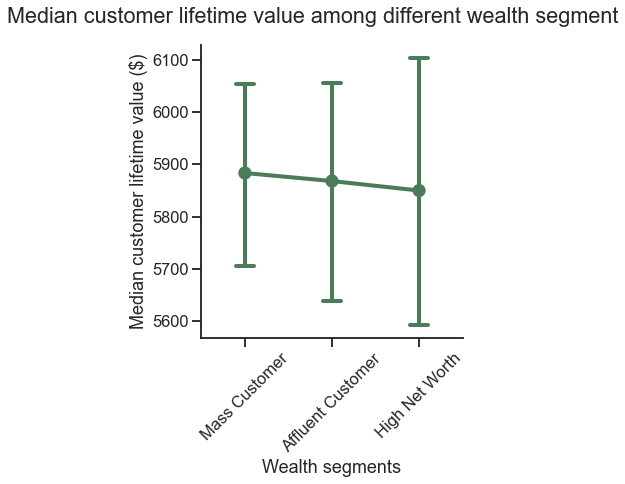

In [27]:
# Whether different weath segments relate to different consumption pattern?
chart1_df = df_join.groupby(by=['customer_id', 'wealth_segment']).agg({'list_price':'sum'}).copy().reset_index()
chart1 = sns.catplot(x='wealth_segment', y='list_price', data=chart1_df, kind='point', order=['Mass Customer', 'Affluent Customer', 'High Net Worth'], estimator=np.median, capsize=0.2)
chart1.fig.suptitle('Median customer lifetime value among different wealth segment', y=1.05)
chart1.set(xlabel='Wealth segments', ylabel='Median customer lifetime value ($)')
plt.xticks(rotation=45)
plt.show()

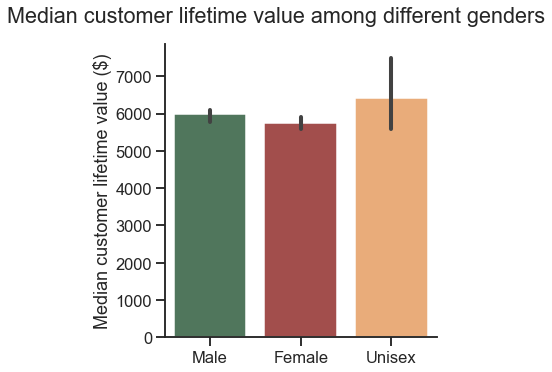

In [28]:
# Whether different genders correlate with divergent customer lifetime value?
chart2_df = df_join.groupby(by=['customer_id', 'gender']).agg({'list_price':'sum'}).copy().reset_index()
chart2 = sns.catplot(x='gender', y='list_price', data=chart2_df, kind='bar', order=['Male', 'Female', 'Unisex'], estimator=np.median)
chart2.fig.suptitle('Median customer lifetime value among different genders', y=1.05)
chart2.set(xlabel='', ylabel='Median customer lifetime value ($)')
plt.show()

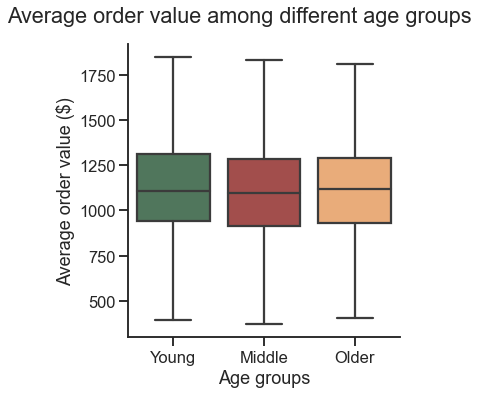

In [29]:
# Whether different age groups have different consumption patterns?
chart3_df = df_join.groupby(by=['customer_id', 'age_group']).agg({'list_price':'mean'}).copy().reset_index()
chart3 = sns.catplot(x='age_group', y='list_price', data=chart3_df, order=['Young', 'Middle', 'Older'], kind='box', estimator=np.mean, sym='')
chart3.fig.suptitle('Average order value among different age groups', y=1.05)
chart3.set(xlabel='Age groups', ylabel='Average order value ($)')
plt.show()

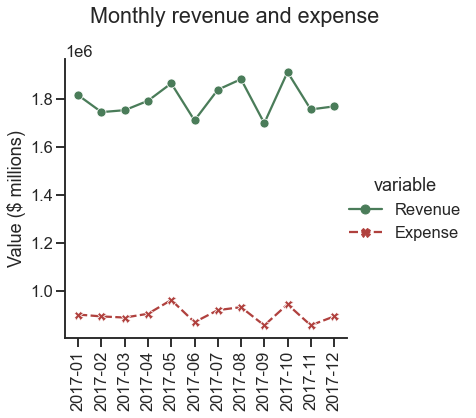

In [30]:
# Daily revenue and cost fluctuations
chart4_df = df_join.groupby(by=['year_month']).agg({'list_price':'sum', 'standard_cost':'sum'}).copy().reset_index()
chart4_df.rename(columns={'list_price':'Revenue', 'standard_cost':'Expense'}, inplace=True)
chart4_df2 = chart4_df.melt(id_vars=['year_month'], value_vars=['Revenue', 'Expense'])
chart4 = sns.relplot(x='year_month', y='value', data=chart4_df2, kind='line', hue='variable', style='variable', markers=True)
chart4.fig.suptitle('Monthly revenue and expense', y=1.05)
chart4.set(xlabel='', ylabel='Value ($ millions)')
plt.xticks(rotation=90)
plt.show()

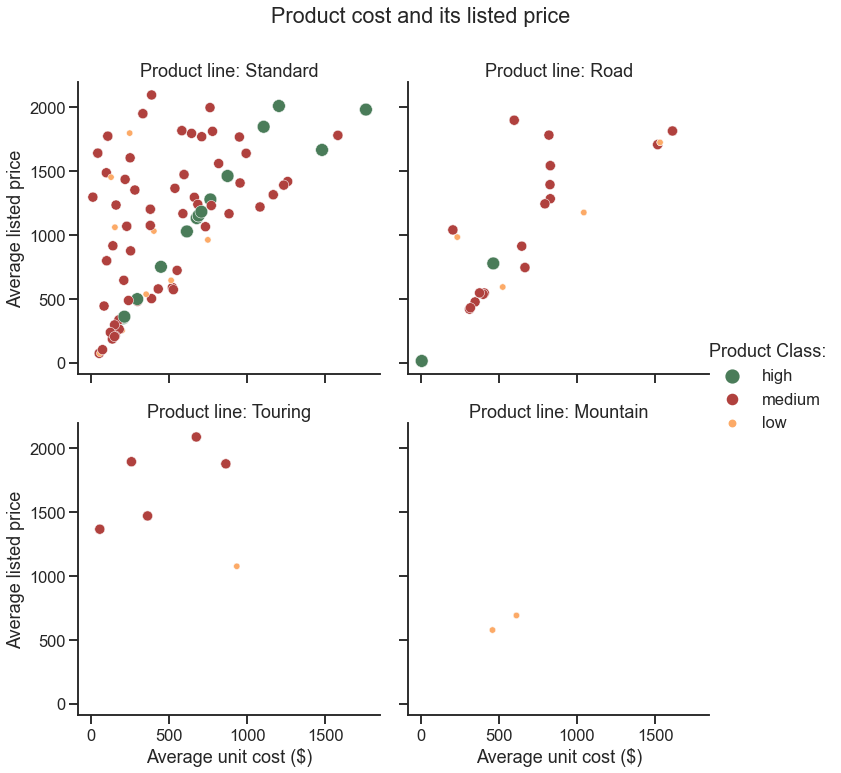

In [31]:
# Correlations a product cost and its price, divided by product lines, product classes
chart5_df = df_join.groupby(by=['product_id', 'product_line', 'product_class']).agg({'list_price':'mean', 'standard_cost':'mean'}).copy().reset_index()
chart5_df.rename(columns={'list_price':'Price', 'standard_cost':'Cost'}, inplace=True)
chart5 = sns.relplot(x='Cost', y='Price', col='product_line', data=chart5_df, kind='scatter', hue='product_class', size='product_class', col_wrap=2, col_order=['Standard', 'Road', 'Touring', 'Mountain'])
chart5.fig.suptitle('Product cost and its listed price', y=1.05)
chart5.set(xlabel='Average unit cost ($)', ylabel='Average listed price')
chart5.set_titles('Product line: {col_name}')
chart5._legend.set_title('Product Class:')
plt.show()